# Packages

In [5]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

# Inspecting Objects and Namespaces

In [ ]:
# Methods and attributes list
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [ ]:
# Example
A = np.array([3,5,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [15]:
A.sum()

np.int64(19)

# 3.6.2 Simple Linear Regression

In [22]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [25]:
X = pd.DataFrame({'Intercept': np.ones(Boston.shape[0]), 
                  'lstat' : Boston['lstat']})
X[:4]

,Intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [29]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [30]:
summarize(results)

,coef,std err,t,P>|t|
Intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


# Using Transformations : Fit and Transform

In [39]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [40]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           5.08e-88
Time:                        16:55:20   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
results.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

In [48]:
# New values for Prediction
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [64]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted

array([29.80359411, 25.05334734, 20.30310057])

In [66]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

# Defining Functions

In [79]:
def abline(ax, b, m, *args, **kwargs) : 
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b , m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

In [83]:
results.params[1]

C:\Users\Mita\AppData\Local\Temp\ipykernel_21360\3757596193.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1]


np.float64(-0.9500493537579922)

C:\Users\Mita\AppData\Local\Temp\ipykernel_21360\925332499.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0], # Intercept b du modèle
C:\Users\Mita\AppData\Local\Temp\ipykernel_21360\925332499.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1], # coefficient directeur du modèle


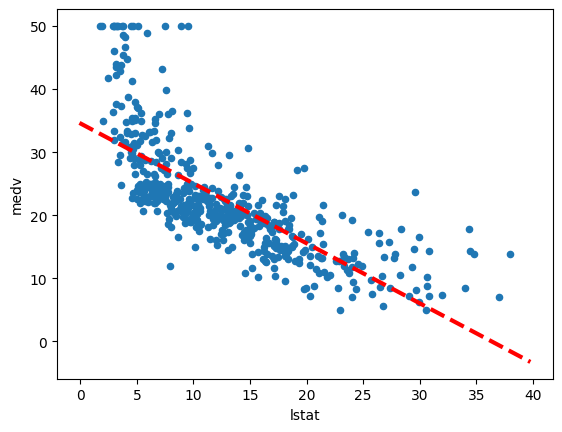

In [84]:
ax = Boston.plot.scatter('lstat', 'medv')

abline(ax, 
       results.params[0], # Intercept b du modèle 
       results.params[1], # coefficient directeur du modèle
       'r--',
       linewidth=3)

On voit qu'il y a la question de la non-linéarité entre la variable lstat et mdev. On explore celà plus tards. 

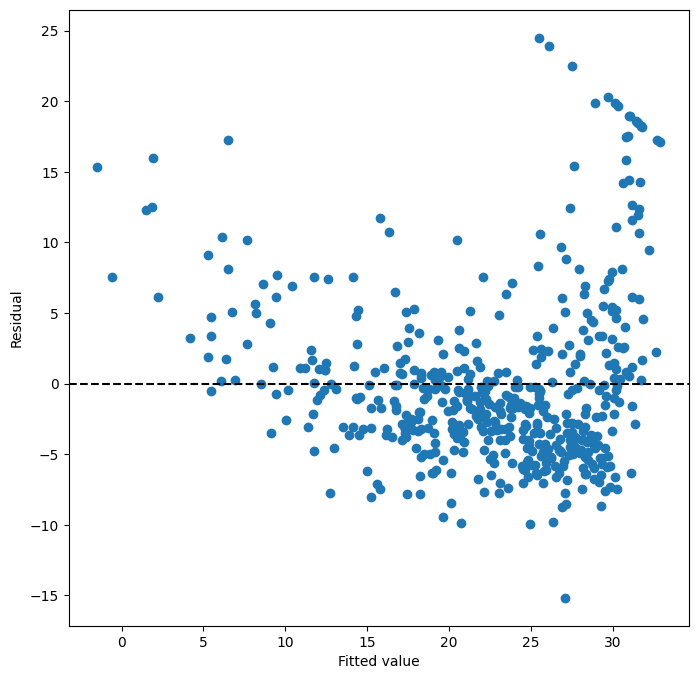

In [92]:
ax = subplots(figsize = (8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

On trace les résidus en fonction des fitted values pour vérifier si l’erreur du modèle dépend du niveau de la prédiction, ce qui révèle biais, non-linéarité ou variance non constante.

## Pourquoi la prédiction parfaite correspond à un résidu égal à 0

En régression linéaire, le **résidu** est défini par :

$$
\text{résidu} = y - \hat{y}
$$

où :
- `y` est la valeur observée,
- `ŷ` (y chapeau) est la valeur prédite par le modèle.

---

### Prédiction parfaite

Une prédiction est dite parfaite lorsque :

$$
y = \hat{y}
$$

Dans ce cas :

$$
y - \hat{y} = 0
$$

Le résidu est donc **nul**.

### Exemples

| y | ŷ | résidu |
|---|---|--------|
| 10 | 10 | 0 |
| 10 | 9 | 1 |
| 10 | 11 | −1 |

---

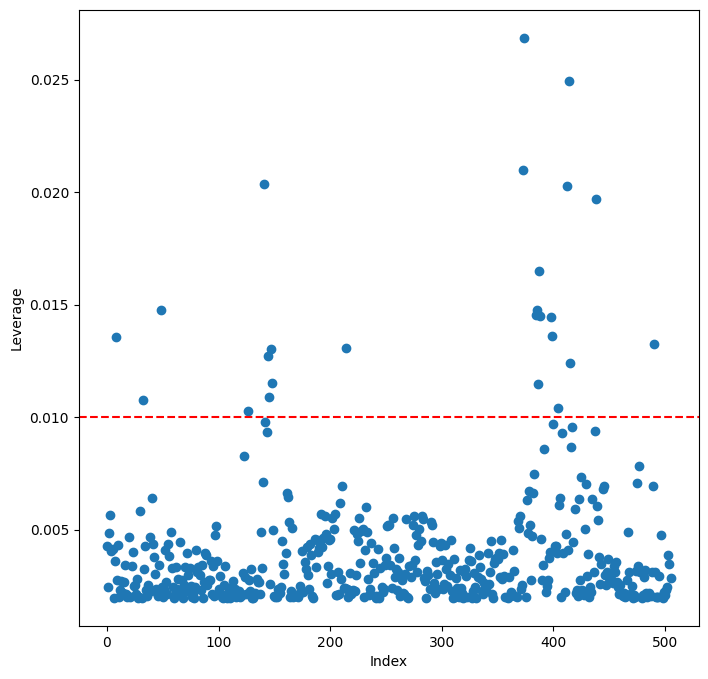

In [99]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
ax.axhline(0.010, color='red', linestyle='--')

Certains points influencent en grande partie la droite de régression que la majorité des points. Ces points peuvent des points influents. Ils modifient la droite d'ajustement et abaissent le niveau général de la prédiction. 

Leur suppression n'est pas automatique. çà dépend de si elle n'est pas des de données bruitées. 